# True/False Positives/Negatives 

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from iminuit import Minuit
from scipy import stats
import os, sys                                         
from os.path import dirname as parent_folde
import pandas as pd

In [3]:
sys.path.append('../AppStat/AppStat2021/External_Functions')
from ExternalFunctions import Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax

sys.path.append('../AppStat/AppStat2021/Emilie_External_Functions')
from EmilieExternalFunctions import zerobin_hist, chi2_test, get_chi2_values

sys.path.append('BachelorExternalFunctions')
from Bachelor_ExternalFunctions import peak_plotter, peak_finder, compare_peaks
from Bachelor_ExternalFunctions import amp_plotter, amplitudes

In [4]:
# Set som plotting standards:

font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18}
mpl.rc('font', **font)


save_plots = False

In [5]:
r = np.random # Random generator
r.seed(41)    # Set a random seed (but a fixed one)
pi = np.pi
time = np.linspace(0, 287/2, 287)
t = time[49:]

In [6]:
resi_m = pd.read_csv(r'Data/resi_m_n4.csv', header=None, index_col=None).to_numpy()
resi_p = pd.read_csv(r'Data/resi_p_n4.csv', header=None, index_col=None).to_numpy()

roll_resi_m = np.zeros(shape=(402, 238))

for i in range(len(resi_m)): 
    roll_resi_m[i] = np.roll(resi_m[i], -3)

In [7]:
Chi2_straight_p = pd.read_csv(r'Data/Straight_Chi2_m.csv', header=None, index_col=None).to_numpy()
Pval_straight_p = pd.read_csv(r'Data/Straight_Pval_m.csv', header=None, index_col=None).to_numpy()

Chi2_straight_m = pd.read_csv(r'Data/Straight_Chi2_m.csv', header=None, index_col=None).to_numpy()
Pval_straight_m = pd.read_csv(r'Data/Straight_Pval_m.csv', header=None, index_col=None).to_numpy()

extended_fit_values_p = pd.read_csv(r'Data/fitvalues_p.csv', header=None, index_col=None).to_numpy()
extended_fit_errors_p = pd.read_csv(r'Data/fiterrors_p.csv', header=None, index_col=None).to_numpy()
extended_Chi2_p = pd.read_csv(r'Data/Chi2_p.csv', header=None, index_col=None).to_numpy()
extended_Pval_p = pd.read_csv(r'Data/Pvals_p.csv', header=None, index_col=None).to_numpy()
extended_new_frames_p = pd.read_csv(r'Data/newframes_p.csv', header=None, index_col=None).to_numpy()

extended_fit_values_m = pd.read_csv(r'Data/fitvalues_m.csv', header=None, index_col=None).to_numpy()
extended_fit_errors_m = pd.read_csv(r'Data/fiterrors_m.csv', header=None, index_col=None).to_numpy()
extended_Chi2_m = pd.read_csv(r'Data/Chi2_m.csv', header=None, index_col=None).to_numpy()
extended_Pval_m = pd.read_csv(r'Data/Pvals_m.csv', header=None, index_col=None).to_numpy()
extended_new_frames_m = pd.read_csv(r'Data/newframes_m.csv', header=None, index_col=None).to_numpy()

In [12]:
Pdiff_p = [extended_Pval_p[i] - Pval_straight_p.flatten()[i] for i in range(len(extended_Pval_p))]
Pdiff_m = [extended_Pval_m[i] - Pval_straight_m.flatten()[i] for i in range(len(extended_Pval_m))]

In [13]:
fit_amps_p = np.array(extended_fit_values_p)[:,0]
fit_amps_err_p = np.array(extended_fit_errors_p)[:,0]

fit_freqs_p = np.array(extended_fit_values_p)[:,2]

fit_amps_m = np.array(extended_fit_values_m)[:,0]
fit_amps_err_m = np.array(extended_fit_errors_m)[:,0]

fit_freqs_m = np.array(extended_fit_values_m)[:,2]

In [14]:
# Getting the significance of the peaks: 

significance_p = np.zeros_like(fit_amps_p)
significance_m = np.zeros_like(fit_amps_m)

for i in range(len(fit_amps_p)): 
    if fit_amps_err_p[i] == 0:    # If the fit didn't converge use 20 as the fit error: 
        significance_p[i] = abs(fit_amps_p[i])/20
    else: 
        significance_p[i] = abs(fit_amps_p[i])/fit_amps_err_p[i]
        
    if fit_amps_err_m[i] == 0:   
        significance_m[i] = abs(fit_amps_m[i])/20
    else: 
        significance_m[i] = abs(fit_amps_m[i])/fit_amps_err_m[i]


# Finding the peaks with low significance: 
low_signi_p = significance_p[significance_p < 3]   
low_signi_idx_p = np.array([np.where(significance_p < 3)])


low_signi_m = significance_m[significance_m < 3]
low_signi_idx_m = np.array([np.where(significance_m < 3)])


# Finding the difference in normalized significance for each trace:

diff_signi_norm = []
diff_signi = [] 

datapoints = 11
fitTrace = len(t) - datapoints

for i in range(len(resi_p)): 
    signi_p = significance_p[fitTrace*i:fitTrace*(i+1)]
    signi_m = significance_m[fitTrace*i:fitTrace*(i+1)]
    
    diff_signi_norm.append(abs(signi_p/max(signi_p) - signi_m/max(signi_m)))
    diff_signi.extend(signi_p - signi_m)

In [30]:
gradients = [] 
norm_gradients = [] 

for i in roll_resi_m:
    gradients.append(np.gradient(i))
    norm_gradients.append(np.gradient(i)/np.max(np.gradient(i)))

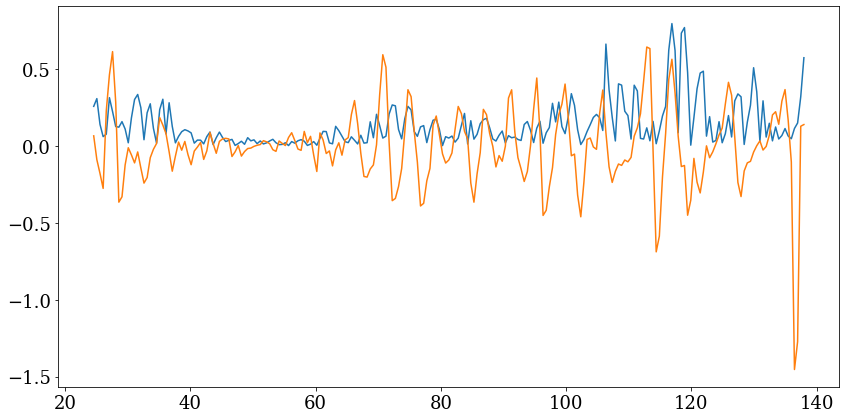

In [33]:
fig, ax = plt.subplots(figsize=(14,7))

plt.plot(t[:-datapoints], diff_signi_norm[0])
plt.plot(t[:-datapoints], norm_gradients[0][datapoints:])

<ipython-input-39-19af275e4ff9>:2: RuntimeWarning: Degrees of freedom <= 0 for slice
  np.cov(Pdiff_m[:227], Pdiff_p[:227])
/Users/emiliejessen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/Users/emiliejessen/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

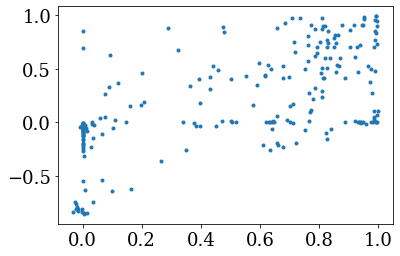

In [39]:
plt.scatter(Pdiff_m[:227], Pdiff_p[:227], marker='.')
np.cov(Pdiff_m[:227], Pdiff_p[:227])

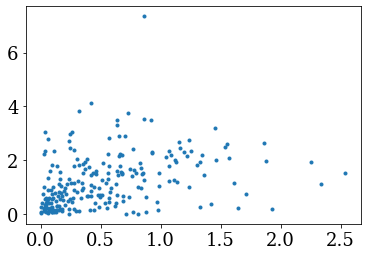

In [37]:
plt.scatter(significance_m[:227], significance_p[:227], marker='.')